In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('../data/Train/train.csv', index_col=0)

In [4]:
train[:5]

,adult_males,subadult_males,adult_females,juveniles,pups
train_id,,,,,
0,62,12,486,42,344
1,2,20,0,12,0
2,2,0,38,20,0
3,8,5,41,7,38
4,6,9,2,0,0


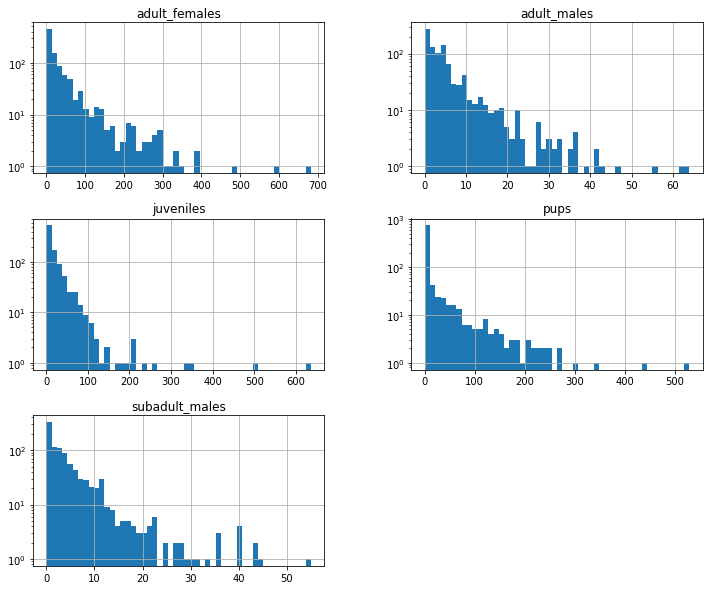

In [5]:
train.hist(figsize=(12, 10), bins=50, log=True);

In [6]:
pred = pd.read_csv('../runs/unet-limit800-clean-lr0.0004/unet-limit800-clean-lr0.0004.csv', index_col=0)

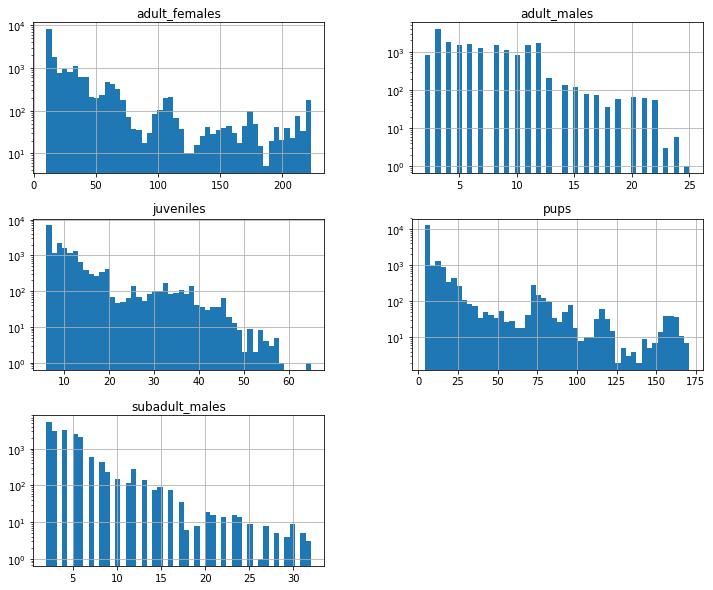

In [7]:
pred.hist(figsize=(12, 10), bins=50, log=True);

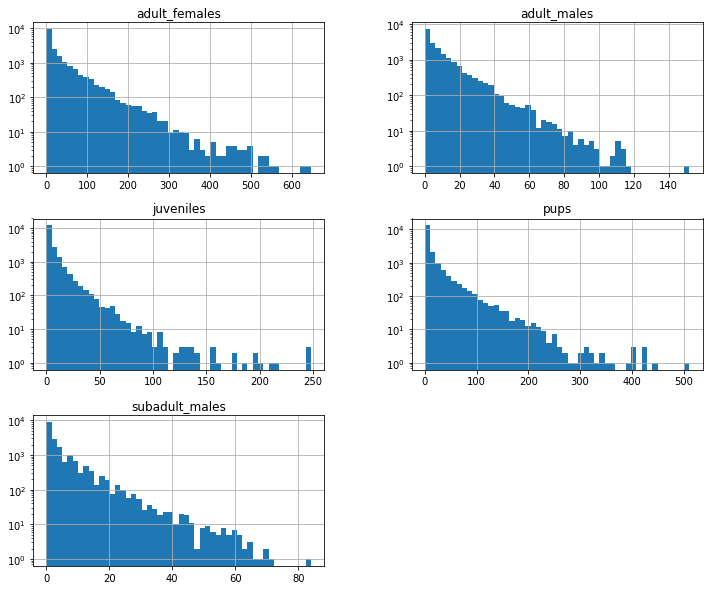

In [8]:
pred_lasso = pd.read_csv('../runs/unet-limit800-clean-lr0.0004/unet-limit800-clean-lr0.0004.csv', index_col=0)
pred_lasso.hist(figsize=(12, 10), bins=50, log=True);